<a href="https://colab.research.google.com/github/Alisha210302/CV/blob/main/CNN_for_Color_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train) , (x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

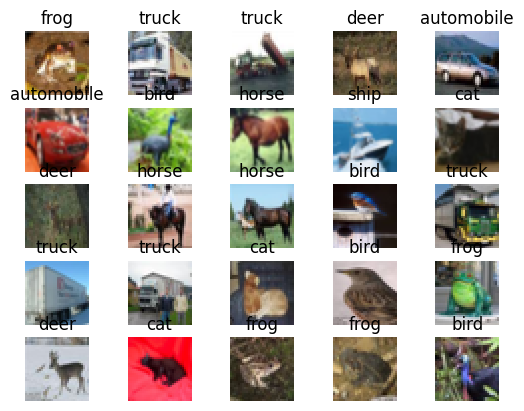

In [4]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(x_train[i])
  plt.title(labels[y_train[i][0]])

### Build the model

In [5]:
model = Sequential()

model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,418 (732.10 KB)

 Trainable params: 187,418 (732.10 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.fit(x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.1789 - loss: 2.6026
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.4178 - loss: 1.6042
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5058 - loss: 1.3915
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5395 - loss: 1.3047
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5723 - loss: 1.2149
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5976 - loss: 1.1474
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6232 - loss: 1.0916
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6347 - loss: 1.0490
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6532 - loss: 1.0089
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6655 - loss: 0.9729


In [9]:
model.evaluate(x_test,y_test,batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5458 - loss: 1.3716


[1.3722323179244995, 0.5473999977111816]

In [10]:
!pip install Pillow
from PIL import Image

In [11]:
import cv2
img = cv2.imread('cat1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(32,32))


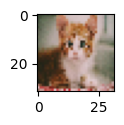

In [12]:
plt.figure(figsize=(1,1))
plt.imshow(img)

In [13]:
img = img.reshape(1,32,32,3)
probs = model.predict(img)
index = probs.argmax()
print(labels[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
cat
